/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


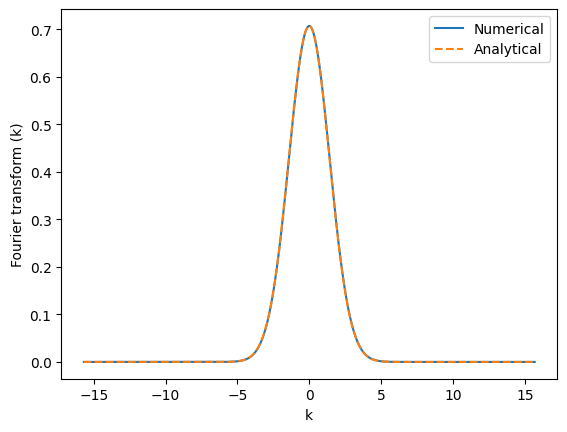

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_limit = 100
num_points = 1001
delta = 2 * x_limit / (num_points - 1)
x_values = np.linspace(-x_limit, x_limit, num_points)
k_values = (2 * np.pi / (num_points * delta)) * np.arange(-(num_points - 1) / 2, (num_points - 1) / 2 + 1)

# ***** NUMERICAL RESULT *******************************************************
scaling_factor = (delta) * np.sqrt(num_points / (2 * np.pi)) * np.exp(-1j * k_values * np.min(x_values))
data_frame = pd.read_csv('transformed_data3.csv', sep=",", header=None)
# print(data_frame)

data_array = data_frame.to_numpy()
ft_C_values = data_array[:, 0] + 1j * data_array[:, 1]
ft_C_values = scaling_factor * np.fft.fftshift(ft_C_values) / np.sqrt(num_points)

# ******** ANALYTICAL RESULT **************************************************
def analytical_function(x):
    return np.exp(-x ** 2 / 4) / (2) ** 0.5

plt.plot(k_values, ft_C_values, label='Numerical')
plt.plot(k_values, analytical_function(k_values), '--', label='Analytical')
plt.xlabel('k')
plt.ylabel('Fourier transform (k)')
plt.legend()
plt.show()
